# IMDB Movie EDA
![ImdbIcon](images/imdbheader.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
final_df = pd.read_csv('./data/final_df.csv')

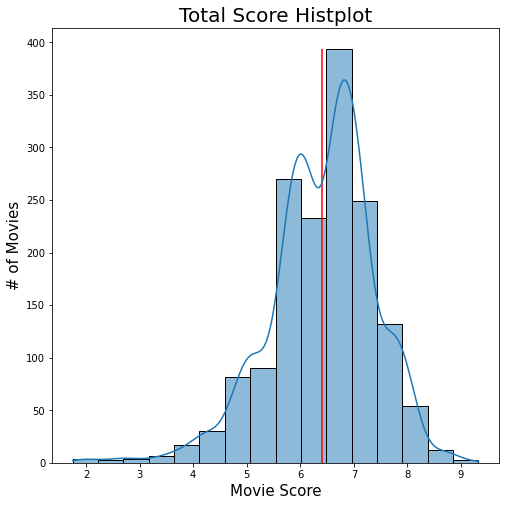

In [3]:
plt.figure(figsize = (8, 8))

sns.histplot(final_df['total_score'], kde=True, bins = 16);

plt.title("Total Score Histplot", size = 20)
plt.xlabel("Movie Score", size = 15)
plt.ylabel("# of Movies", size = 15);

plt.vlines(x = np.mean(final_df['total_score']), ymin = 0, ymax = 394, color = 'r');

plt.savefig("./images/total_score_histplot.png")

C:\Users\nolan_fur2pfn\.conda\envs\tf\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


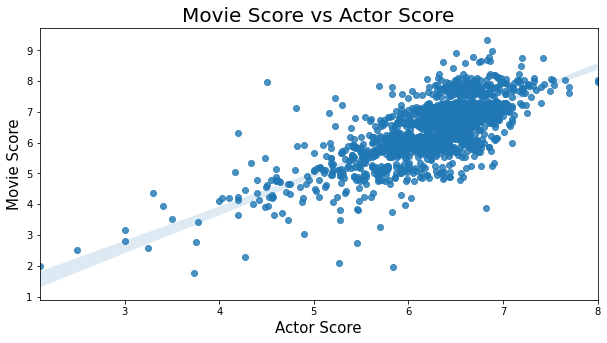

In [4]:
plt.figure(figsize= (10, 5));

sns.regplot(data = final_df, x="actor_score", y="total_score")

plt.title("Movie Score vs Actor Score", size = 20)
plt.xlabel("Actor Score", size = 15)
plt.ylabel("Movie Score", size = 15);

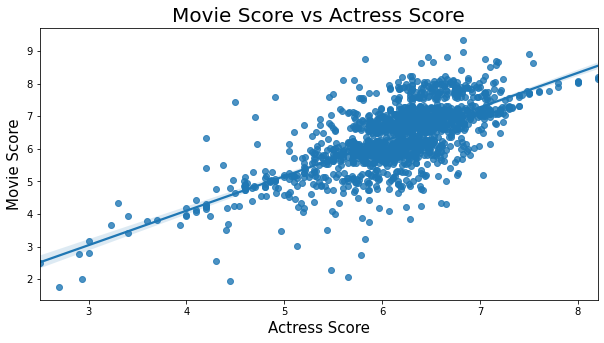

In [5]:
plt.figure(figsize= (10, 5));

sns.regplot(data = final_df, x="actress_score", y="total_score")

plt.title("Movie Score vs Actress Score", size = 20)
plt.xlabel("Actress Score", size = 15)
plt.ylabel("Movie Score", size = 15);

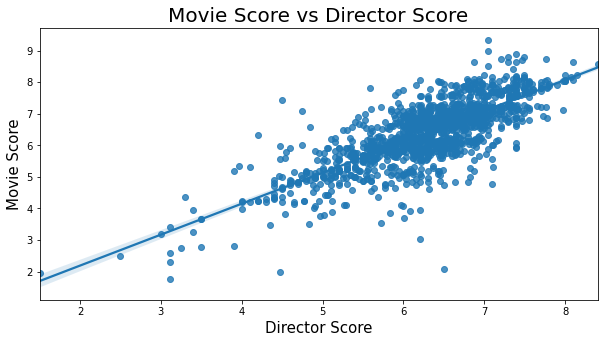

In [6]:
plt.figure(figsize= (10, 5));

sns.regplot(data = final_df, x="director_score", y="total_score")

plt.title("Movie Score vs Director Score", size = 20)
plt.xlabel("Director Score", size = 15)
plt.ylabel("Movie Score", size = 15);

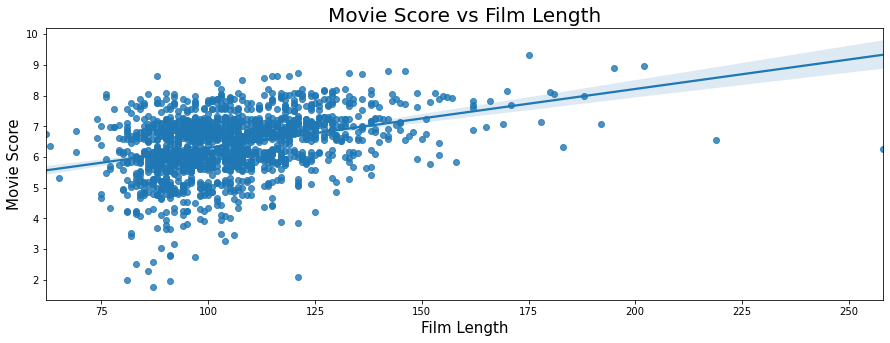

In [7]:
plt.figure(figsize= (15, 5));

sns.regplot(data = final_df, x="duration", y="total_score")

plt.title("Movie Score vs Film Length", size = 20)
plt.xlabel("Film Length", size = 15)
plt.ylabel("Movie Score", size = 15)

plt.xticks();

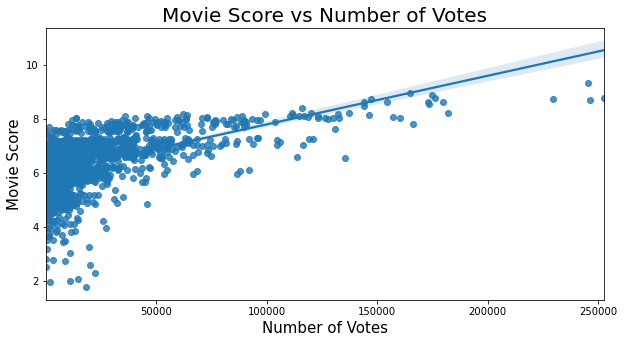

In [8]:
plt.figure(figsize= (10, 5));

sns.regplot(data = final_df, x="us_voters_votes", y="total_score")

plt.title("Movie Score vs Number of Votes", size = 20)
plt.xlabel("Number of Votes", size = 15)
plt.ylabel("Movie Score", size = 15)

plt.xticks();

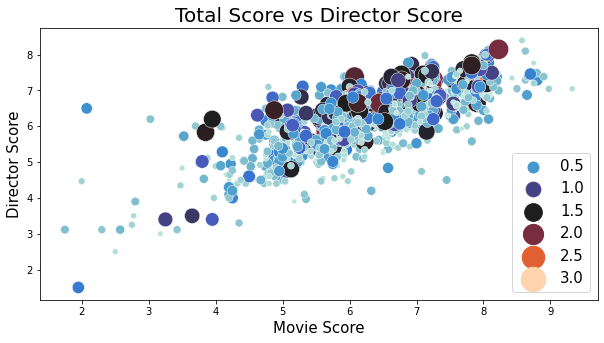

In [9]:
plt.figure(figsize= (10, 5));

sns.scatterplot(data = final_df, x="total_score", y="director_score", 
                hue = 'budget', size = 'budget', sizes = (25, 600), 
                palette = 'icefire') # icefire / ocean

plt.legend(loc = 'best', fontsize = 15)
plt.title("Total Score vs Director Score", size = 20)
plt.xlabel("Movie Score", size = 15)
plt.ylabel("Director Score", size = 15);

plt.savefig("./images/directortotalscore_budget.png")

In [10]:
final_df[(final_df['total_score'] < 3.5) & (final_df['director_score'] < 4)].sort_values(by = ['budget'], ascending=False)[0:1]

,movie_title,year,tagline,plot,cast,duration,Action,Adventure,Animation,Biography,...,actor_score,actress_score,tagline_sentiment,plot_sentiment,total_score,profitable,budget,revenue,budget_adj,revenue_adj
224,Catwoman,2004,CATch Her In IMAX,"A shy woman, endowed with the speed, reflexes,...","Halle Berry, Benjamin Bratt, Sharon Stone, Lam...",104,1.0,0.0,0.0,0.0,...,5.695,5.82,0.0,0.3182,3.25,0,100000000,82102379,115444540,94782713


In [11]:
final_df['rounded_score_one'] = final_df['total_score'].round(1)
final_df['rounded_score_whole'] = final_df['total_score'].round()

C:\Users\nolan_fur2pfn\.conda\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


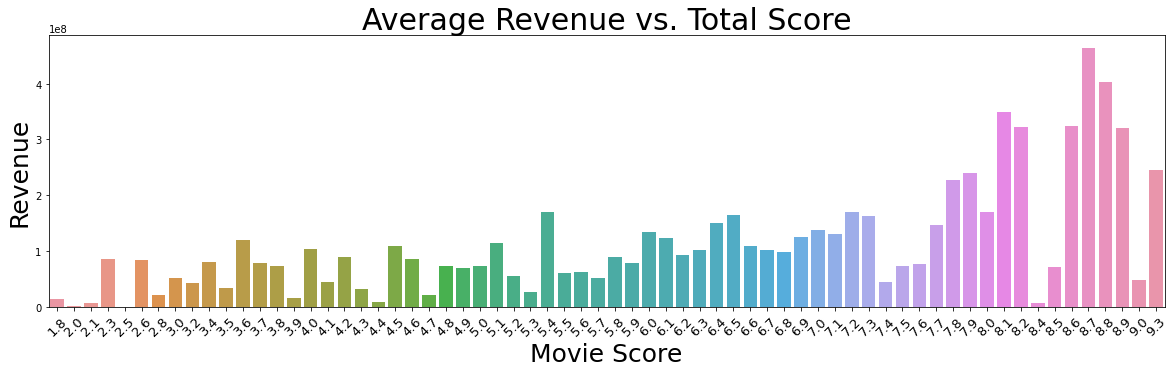

In [12]:
plt.figure(figsize = (20, 5))

average_rev = final_df.groupby("rounded_score_one").revenue.mean()
sns.barplot(average_rev.index, average_rev.values)

plt.title("Average Revenue vs. Total Score", size = 30)
plt.xlabel("Movie Score", size = 25)
plt.xticks(size = 13, rotation = 45)
plt.ylabel("Revenue", size = 25);

C:\Users\nolan_fur2pfn\.conda\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


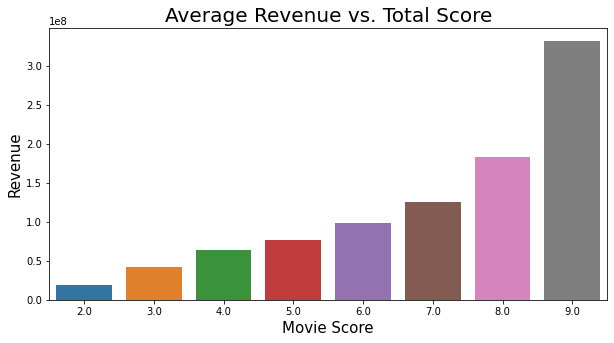

In [13]:
plt.figure(figsize = (10, 5))

average_rev = final_df.groupby("rounded_score_whole").revenue.mean()
sns.barplot(average_rev.index, average_rev.values)

plt.title("Average Revenue vs. Total Score", size = 20)
plt.xlabel("Movie Score", size = 15)
plt.ylabel("Revenue", size = 15);

plt.savefig("./images/revenue_totalscore.png")

In [14]:
genres = ['Action', 'Adventure', 'Animation', 'Biography', 
            'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 
            'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
            'Sport', 'Thriller', 'War', 'Western']

for genre in genres:
    final_df.loc[final_df[genre] == 1, 'revenue'].mean()
    print(genre, final_df.loc[final_df[genre] == 1, 'revenue'].mean())

Action 188022377.45478722
Adventure 292584953.1702899
Animation 290548366.93939394
Biography 77148796.5
Comedy 109884475.53810264
Crime 66397448.83838384
Drama 77070478.24677187
Family 140030612.25742576
Fantasy 185415861.64566928
History 121381756.63636364
Horror 55201002.13705584
Music 64624731.321428575
Musical 49810440.25
Mystery 87146698.3014706
Romance 82874795.5326087
Sci-Fi 210786845.97841728
Sport 59544481.815789476
Thriller 83445698.28735632
War 56002542.222222224
Western 132977920.0


In [15]:
genres = ['Action', 'Adventure', 'Animation', 'Biography', 
            'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 
            'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
            'Sport', 'Thriller', 'War', 'Western']

for genre in genres:
    final_df.loc[final_df[genre] == 1, 'total_score'].mean()
    print(genre, final_df.loc[final_df[genre] == 1, 'total_score'].mean())

Action 6.3467074468085105
Adventure 6.562134057971015
Animation 6.819444444444446
Biography 7.208333333333334
Comedy 6.321531881804043
Crime 6.48356228956229
Drama 6.682272596843616
Family 6.170673267326732
Fantasy 6.274511811023622
History 6.770454545454546
Horror 5.863040609137056
Music 6.490196428571429
Musical 5.7562500000000005
Mystery 6.342279411764706
Romance 6.396311594202899
Sci-Fi 6.366064748201438
Sport 6.841447368421053
Thriller 6.274432950191571
War 6.355555555555556
Western 6.859


In [16]:
### loop to create regression model for each genre
### for loop to subset data (by genre)
### build simple linear model for each genre (feature importance)
### save in dict

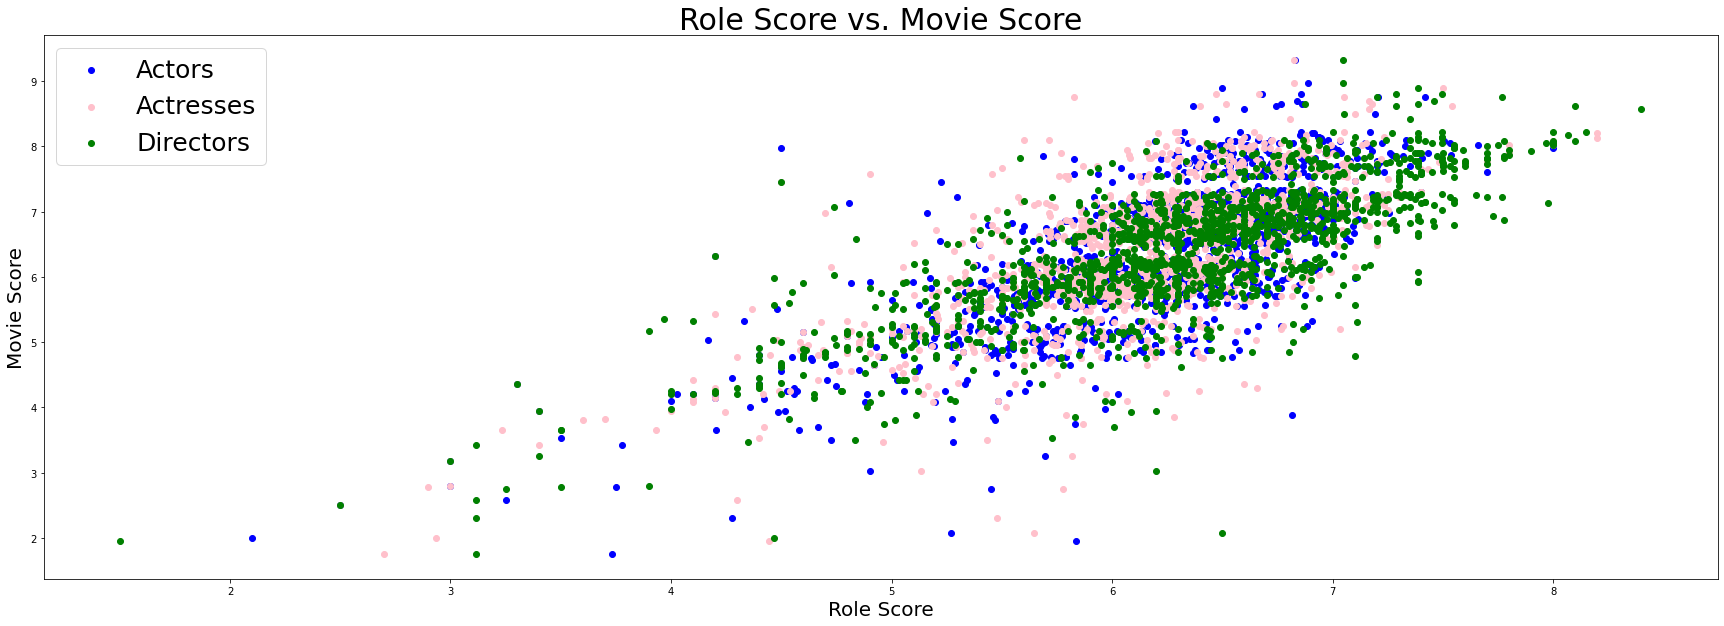

In [17]:
plt.figure(figsize=(30, 10))

plt.scatter(final_df['actor_score'],
            final_df['total_score'], color='blue', label = 'Actors'); 

plt.scatter(final_df['actress_score'],
            final_df['total_score'], color='pink', label = 'Actresses'); 

plt.scatter(final_df['director_score'],
            final_df['total_score'], color='green', label = 'Directors'); 

plt.title("Role Score vs. Movie Score", fontsize=30)
plt.ylabel("Movie Score", fontsize = 20)
plt.xlabel("Role Score", fontsize = 20);

plt.legend(fontsize = 25);

In [18]:
final_df.sort_values(by = 'total_score', ascending = False)

,movie_title,year,tagline,plot,cast,duration,Action,Adventure,Animation,Biography,...,tagline_sentiment,plot_sentiment,total_score,profitable,budget,revenue,budget_adj,revenue_adj,rounded_score_one,rounded_score_whole
1256,The Godfather,1972,An offer you can't refuse.,The aging patriarch of an organized crime dyna...,"Marlon Brando, Al Pacino, James Caan, Richard ...",175,0.0,0.0,0.0,0.0,...,0.2235,-0.6705,9.325,1,6000000,245066411,31287365,1277913732,9.3,9.0
1257,The Godfather: Part II,1974,"I don't feel I have to wipe everybody out, Tom...",The early life and career of Vito Corleone in ...,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",202,0.0,0.0,0.0,0.0,...,-0.4939,-0.4767,8.975,1,13000000,47542841,57489690,210247939,9.0,9.0
997,Schindler's List,1993,"Whoever saves one life, saves the world entire.","In German-occupied Poland during World War II,...","Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",195,0.0,0.0,0.0,1.0,...,0.0000,-0.5994,8.900,1,22000000,321265768,33208339,484941026,8.9,9.0
487,Goodfellas,1990,Three Decades of Life in the Mafia.,The story of,"Robert De Niro, Ray Liotta, Joe Pesci, Lorrain...",146,0.0,0.0,0.0,1.0,...,0.0000,0.0000,8.800,1,25000000,46836394,41722463,78165189,8.8,9.0
437,Forrest Gump,1994,"The world will never be the same, once you've ...","The presidencies of Kennedy and Johnson, the e...","Tom Hanks, Rebecca Williams, Sally Field, Mich...",142,0.0,0.0,0.0,0.0,...,0.0000,0.7906,8.800,1,55000000,677945399,80911135,997333314,8.8,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,Epic Movie,2007,We know it's big. We measured.,A spoof on previous years' epic movies (,"Kal Penn, Adam Campbell, Jennifer Coolidge, Ja...",86,0.0,1.0,0.0,0.0,...,0.0000,0.0000,2.300,1,20000000,86865564,21033371,91353784,2.3,2.0
479,Gigli,2003,Life doesn't play by the rules.,Larry Gigli is assigned by a crime boss to kid...,"Ben Affleck, Terry Camilleri, David Backus, Le...",121,0.0,0.0,0.0,0.0,...,-0.2584,0.7278,2.075,0,54000000,7266209,64009042,8613020,2.1,2.0
457,From Justin to Kelly,2003,The tale of two American Idols.,A waitress from Texas and a college student fr...,"Kelly Clarkson, Justin Guarini, Katherine Bail...",81,0.0,0.0,0.0,0.0,...,0.0000,0.7650,2.000,0,12000000,4922166,14224231,5834502,2.0,2.0
429,Foodfight!,2011,When good food... goes bad!,The evil Brand X joins a supermarket that beco...,"Charlie Sheen, Hilary Duff, Eva Longoria, Wayn...",91,1.0,1.0,1.0,0.0,...,-0.2244,-0.6597,1.950,0,65000000,73706,61733378,70001,2.0,2.0
